In [1]:
import pylab             as     pl
import numpy             as     np
import matplotlib.pyplot as     plt

from   astropy.cosmology import Planck15

# OII y más galaxias

Ya sea observando cada vez más distantes o recolectando aquellas que hemos perdido anteriormente, ¡nuestra ciencia siempre mejora con más galaxias! El problema es que ya hemos analizado todas las galaxias fáciles y brillantes y las cosas se ponen más difíciles a medida que nos vemos obligados a observar las galaxias más débiles que conocemos. Tenemos que ser inteligentes sobre cómo hacemos esto y, a veces, se presenta una oportunidad sorprendente ...

_Advertencia: este cuaderno aumenta la dificultad para permitirnos diseñar experimentos más divertidos basados ​​en lo que aprenderás aquí. Si tienes algún problema, [pregunta](https://github.com/michaelJwilson/DESI-HighSchool/issues/new/choose). ¡Quédate con nosotros!_

¿Estás cansado de escuchar a tus padres? Los átomos sienten lo mismo. Su vida es una serie de reglas, reglas, reglas. Haz esto, no hagas aquello; la [lista](https://es.wikipedia.org/wiki/Transición_electrónica) es larga. Pero a veces, se cansan y se rebelan,

![title](images/Climate.png)

Resulta que una rebelión, de vez en cuando, puede ser algo bueno. Por ejemplo, el oxígeno (doblemente) ionizado o [OII], (increíblemente raramente) emite un doblete único que no lo haría [de otra manera](https://es.wikipedia.org/wiki/L%C3%ADnea_prohibida). Veamos qué pasa.

In [2]:
# Longitudes de onda del doblete OII.
lambdaa = 3727.092 # Angstroms
lambdab = 3729.875 # Angstorms

# Energía promedio ponderado.
OII     = 3728.483

# Anchura de cada línea debido al ensanchamiento térmico. 
def width(center, dv):    
    # diferencia de velocidad [velocidad de la luz]
    return  center * dv

Text(0, 0.5, 'Flujo normalizado')

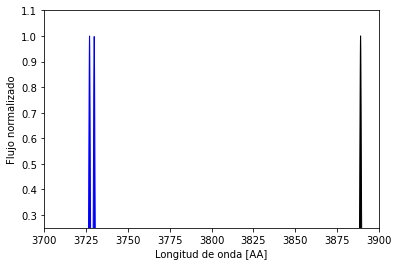

In [3]:
wave     = np.arange(1000, 1.e4, 0.05)

dlambdaa = width(lambdaa, 1.e-4)
dlambdab = width(lambdab, 1.e-4) 

def gaussian(wave, center, width):
    #  https://es.wikipedia.org/wiki/Función_gaussiana
    norm = np.sqrt(2. * np.pi / width)
    
    return  np.exp(-0.5 * (wave - center)**2. / width**2.)

ax       = pl.gca()

ax.fill_between(wave, 0., gaussian(wave, lambdaa, dlambdaa), color='b', alpha=1.0)
ax.fill_between(wave, 0., gaussian(wave, lambdab, dlambdab), color='b', alpha=1.0)

ax.fill_between(wave, 0., gaussian(wave, 3889.0, width(3889.0, 1.e-4)), color='k', alpha=1.)

pl.xlim(3700., 3900.)
pl.ylim(0.25, 1.1)

pl.xlabel('Longitud de onda [AA]')
pl.ylabel('Flujo normalizado')

Primero, las transiciones _prohibidas_ [OII] (azul) representan un doblete de dos líneas poco espaciadas. Estas tienen un ancho finito ya que las estrellas emisoras se mueven (al 0.01% en este ejemplo), lo que lleva al ensanchamiento Doppler habitual. Contrasta esto con la línea negra He I, que es una sola línea o "singlete". El problema es que una sola línea emitida por una galaxia a un desplazamiento al rojo dado puede parecer una línea diferente a otro desplazamiento al rojo.

Tu turno, si hubiera un emisor Lyman-$\alpha$ en $z=4.0$, ¿podrías notar la diferencia de un emisor H-$\alpha$ (6564.61 Angstroms) a un desplazamiento al rojo diferente? ¿Qué desplazamiento al rojo tendría esta segunda galaxia? Recuerda, la longitud de onda observada es $(1 + z) \ \times$ la longitud de onda del marco en reposo, y Lyman-$\alpha$ es la transición 2-1 del hidrógeno que vimos en la introducción.

Entonces, [OII] es único en el sentido de que, como doblete, es más probable que podamos distinguirlo de los singletes a diferentes desplazamientos al rojo. La segunda gran cosa es que es la segunda línea más fuerte emitida por estrellas jóvenes (la primera es H-$\alpha$), como en las nebulosas de Orión, una imagen icónica de la formación de estrellas:

<img src="images/orion.jpg" alt="Drawing" style="width: 800px;"/>

Las galaxias con alto corrimiento al rojo son estrellas más jóvenes y en formación más activa, por lo que emiten gran cantidad de [OII]. Entonces, a medida que miramos más lejos, es más probable que veamos emisores de OII. Como estas galaxias están tan lejos, sería muy difícil detectar algo tan débil si no fuera por esta emisión de OII:

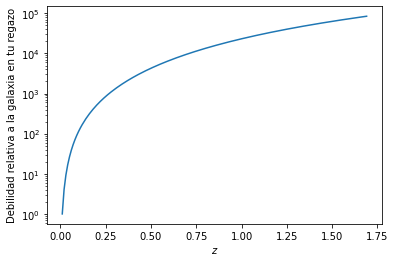

In [4]:
zs       = np.arange(0.01, 1.7, 0.01)
lumdists = Planck15.luminosity_distance(zs)

faints   = (lumdists / lumdists[0])**2.

pl.xlabel(r'$z$')
pl.ylabel('Debilidad relativa a la galaxia en tu regazo')

pl.semilogy(zs, faints)

A $z=0.25$, una galaxia es 1000 veces más débil de lo que sería en tu regazo. Para $z=1.75$, el ELG más lejano detectado por DESI, es 10,000 veces más débil (cuanto más débil depende de si hay Energía Oscura en el Universo; aquí asumimos el ~ 70% que aprendimos en la Introducción). [Astropy](https://docs.astropy.org/en/stable/index.html) hace que esto sea realmente fácil de entender, pero sería mucho mejor entender cómo llegar allí. Para tener una idea, intenta [aquí](https://in-the-sky.org/article.php?term=cosmological_distance).

Entonces, queremos galaxias de línea de emisión (ELG) con un doblete OII. Será mejor que nos aseguremos de que nuestro telescopio y nuestro instrumento para dispersar la luz sean capaces de detectar y "resolver" esta débil señal. Fundamentalmente, nuestro instrumento debe estar diseñado para asegurar que el doblete no sea borroso, ya que esto convertiría el doblete en un singlete y conduciría a la misma confusión que nos gustaría evitar. La pregunta es, ¿cómo deberíamos hacer esto? ¿Sería un simple [prisma](https://es.wikipedia.org/wiki/Prisma_(óptica)) de laboratorio suficiente?

La respuesta es no, el prisma tendría que ser demasiado grande y perder demasiada luz para lograr la dispersión (separación entre colores) requerida. Necesitamos algo más avanzado, una rejilla, que pueda dispersar la luz debido a la difracción (o reflexión) y la interferencia causada por una serie de rendijas grabadas en metal (con diamante). Consulta [aquí](https://es.wikipedia.org/wiki/Red_de_difracción) para obtener más detalles.

De hecho, DESI usa una rejilla especial que cambia el [índice de refracción](https://es.wikipedia.org/wiki/Índice_de_refracción) del vidrio, miles de veces por milímetro, para lograr el mismo [efecto](https:arxiv.org/pdf/1611.00037.pdf):

<img src="images/vpg.jpg" alt="Drawing" style="width: 700px;"/>

Grabar estas líneas es costoso, por lo que debemos minimizar la cantidad que necesitamos. No desperdiciarías dinero de tu bolsillo, ¿verdad? Entonces, ¿qué resolución _necesitamos_ para hacer ciencia con galaxias de línea de emisión (OII)? ¿Y qué significa eso para el instrumento que necesitamos construir?

La resolución $R$ se define como $(\Delta \lambda /\lambda)$, donde $\Delta \lambda$ es el ancho efectivo de una línea (gaussiana). Entonces, a medida que la resolución instrumental disminuye, nuestras líneas observadas se amplían:

In [5]:
def dlamba_inst(R, z, center):
    # ecuación (2) de https://arxiv.org/pdf/1310.0615.pdf
    return  (1. + z) * center / R # [Angstroms]

(3710.0, 3750.0)

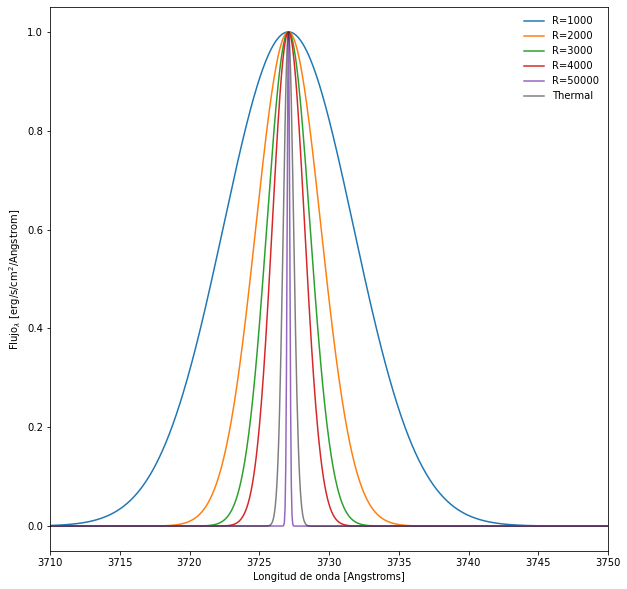

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

for R in [1000., 2000., 3000., 4000., 5.e4]:
    ax.plot(wave, gaussian(wave, lambdaa, dlamba_inst(R, 0.25, lambdaa)), label='R={:.0f}'.format(R))
    
ax.plot(wave, gaussian(wave, lambdaa, dlambdaa), color='k', alpha=0.5, label='Thermal')
    
ax.set_xlabel('Longitud de onda [Angstroms]')
ax.set_ylabel('Flujo$_{\lambda}$ [erg/s/cm$^2$/Angstrom]')

ax.legend(frameon=False, loc=1)
ax.set_xlim(3710., 3750.)

Entonces, ¿una resolución de $R=50,000$ tendría sentido para DESI? No, ya que la línea sería más ancha debido, simplemente, a la velocidad térmica del gas emisor en la galaxia. Veamos esto. Si tenemos el ensanchamiento correcto debido tanto a la velocidad de dispersión del gas emisor, como al instrumento, el ancho se satura sin importar la resolución instrumental:

In [7]:
def dlamba_tot(R, z, center, v=1.e-4):
    # Anchuras de las Gausianas sumadas en cuadraturas; (https://es.wikipedia.org/wiki/Propagación_de_errores).
    return np.sqrt(dlamba_inst(R, z, center)**2. + width(center, v)**2.)

(3710.0, 3750.0)

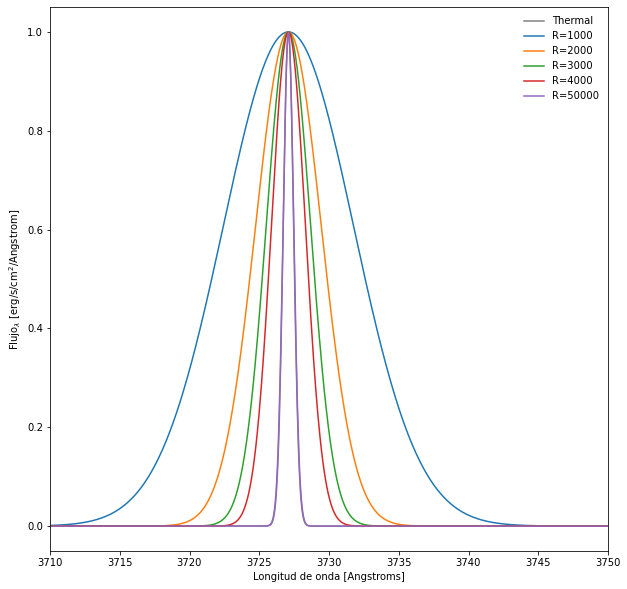

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.plot(wave, gaussian(wave, lambdaa, dlambdaa), color='k', alpha=0.5, label='Thermal')

for R in [1000., 2000., 3000., 4000., 5.e4]:
    ax.plot(wave, gaussian(wave, lambdaa, dlamba_tot(R, 0.25, lambdaa)), label='R={:.0f}'.format(R))
        
ax.set_xlabel('Longitud de onda [Angstroms]')
ax.set_ylabel('Flujo$_{\lambda}$ [erg/s/cm$^2$/Angstrom]')
       
ax.legend(frameon=False, loc=1)
ax.set_xlim(3710., 3750.)

¡Entonces pueden ver que con un instrumento insuficiente, [OII] se volverá borroso y totalmente inútil para nosotros! Pero necesitamos saber qué es lo suficientemente bueno. Intentemos.

La resolución $R$ define el elemento de resolución como $R= (\lambda / \Delta \lambda)$, como se indicó anteriormente, para una galaxia con desplazamiento al rojo $z$, por ejemplo:

In [9]:
R       = 9.e3
z       = 1.00

dando el ancho de un elemento de resolución como

In [10]:
dlambda = OII * (1 + z) / R  # [Angstroms].

Un famoso [teorema](https://es.wikipedia.org/wiki/Teorema_de_muestreo_de_Nyquist-Shannon) - que por cierto es un punto de entrada a la [Teoría de la información](https://es.wikipedia.org/wiki/Teor%C3%ADa_de_la_información) y el mundo digital,  nos dice que necesitamos muestrear un elemento de resolución al menos _dos veces_ para reconstruir con precisión la función (de paso de banda limitado) que muestrea. Para estar seguros, lo muestraremos tres veces, dado un ancho de píxel de 1/3 del ancho del elemento de resolución:

In [11]:
# Ancho de un pixel en Angstroms, en lugar del elemento de resolución. 
dlambda  /= 3.

In [12]:
# Hagamos coincidir la longitud de onda con la malla de píxeles. 
wave     = np.arange(3600, 1.e4, dlambda)

Ahora, el Telescopio Mayall utilizado por DESI tiene un espejo (primario) de 3,8 m de diámetro, por lo que tiene un área de

In [13]:
# Área del espejo primario, circular, de DESI.
Area  = np.pi * (3.8 / 2.)**2.

# [m] to [cm].
Area *= 1.e4

Area # [cm^2]

113411.49479459153

con este espejo suavemente curvado para enfocar la luz a un punto en el [foco](https://en.wikipedia.org/wiki/Cassegrain_reflector), con una distancia focal de 10,7 m.

<img src="images/mirror.jpg" alt="Drawing" style="width: 700px;"/>

Cuando DESI apunta al cielo, capta instantáneamente de la luz por 5000 fibras individuales a la vez. Puedes ver 500 en un "pétalo" en forma de cuña debajo

<img src="images/petal.jpg" alt="Drawing" style="width: 700px;"/>

Cada fibra tiene un diámetro $w=107 \mu m$ o $10^{-4}m$ y 10 de los pétalos anteriores pueblan el plano focal DESI. Con la distancia focal de $f_{\rm{M1}} = 10.7$m, cada fibra recibe luz de un parche circular en el cielo de $\theta \simeq (w/2) \ / \ f_{\rm{M1}}$.

In [14]:
# Radio angular de la fibra, en lugar del diámetro. 

theta  = 107e-6 / 2 / 10.7 # [radianes]
theta *= 180. / np.pi      # [grados]
theta *= 60. * 60.         # [segundos de arco]  

In [15]:
theta                      # [segundos de arco] 

1.0313240312354819

En realidad, la 'escala de la placa' varía de tal manera que una mejor aproximación es 1,5 segundos de arco.

In [16]:
theta = 1.5                # [segundos de arco]

Cada fibra tiene un pequeño motor que puede viajar para observar cualquier galaxia dentro de cada círculo que se muestra: (Puedes ver más ejemplos con el [visor](https://www.legacysurvey.org/viewer#IC%201229) ).

<img src="images/Fiber.png" alt="Drawing" style="width: 700px;"/>

La luz recibida por cada fibra se redirige a lo largo de una fibra óptica para finalmente aterrizar en un solo píxel de un CCD, donde cada fotón se convierte en un electrón por el [efecto fotoeléctrico](https://es.wikipedia.org/wiki/Efecto_fotoeléctrico): ¡uno de los primeros descubrimientos en Mecánica Cuántica hecho por Einstein!

Nuestro primo cercano, el Dark Energy Survey, observa en un gemelo idéntico al Mayall en Chile y tiene algunos de los [CCD](https://www.darkenergysurvey.org/the-des-project/instrument/the-camera/) más bonitos alrededor (cada rectángulo). En total, se muestran sesenta y dos CCDS, con 2048 x 4096 píxeles cada uno, ¡para un total de 520 millones de píxeles! En comparación, los últimos iPhones tienen [12 millones de píxeles](https://www.iphonefaq.org/archives/976253).

<img src="images/des.jpg" alt="Drawing" style="width: 700px;"/>

Ahora, el número de galaxias que necesitamos (17 millones de ELG) define la luminosidad de la línea (brillo de la cantidad) de [OII] que necesitamos alcanzar, ese es nuestro objetivo.

In [17]:
line_flux = 8.e-17               # [ergs/s/cm2].

Hablemos de unidades. Un ergio es $10^{-7}$ Joules, por lo que es una cantidad muy pequeña de energía, en Joules, que llega por segundo, en un cm2.

In [18]:
def model(wave, sigma, z, r=0.7):
    # Unidad de amplitud, sigma es la anchura de la línea, z es el redshift y r es la amplitud relativa de ls líneas en el doblete.
    return 1. / (1. + r) / np.sqrt(2. * np.pi) / sigma * (r * np.exp(- ((wave - lambdaa * (1. + z)) / np.sqrt(2.) / sigma)**2.) + np.exp(- ((wave - lambdab * (1. + z)) / np.sqrt(2.) / sigma)**2.))

(7440.0, 7480.0)

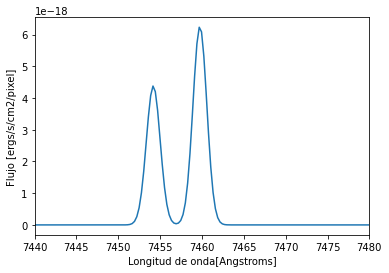

In [19]:
width    = dlamba_inst(R, z, lambdaa)

profile  = model(wave, width, z) # [1/Angstrom].
profile *= line_flux             # [ergs/s/cm2/Angstrom].
profile *= dlambda               # [ergs/s/cm2/pixel].

pl.clf()
pl.plot(wave, profile)
pl.xlabel('Longitud de onda[Angstroms]')
pl.ylabel('Flujo [ergs/s/cm2/pixel]')

pl.xlim((1. + z) * 3720., (1. + z) * 3740.)

In [20]:
# Sumando sobre píxeles, da el flujo total en la línea de nuevo. 
np.sum(profile)                 # [ergs/s/cm2].

7.999999999996866e-17

La energía de cada OII [fotón](https://es.wikipedia.org/wiki/Fotón) que recibimos se puede calcular usando $E=h \nu$, donde $h=6.626 \times 10^{-34} J \cdot s$ y la frecuencia está dada por $c = \nu \cdot \lambda$.

In [21]:
c        = 2.9979e8 * 1.e10     # [Angstrom/s].

nus      = c / wave             # [Hertz] = [s^{-1}].

Energys  = 6.626e-34 * nus      # [Joules]
Energys *= 1.e7                 # [ergs]

Entonces, la galaxia emisora ​​de OII más débil que podríamos observar daría como resultado que cada píxel de DESI (en longitud de onda, 15 $\mu m$ en tamaño físico) reciba una cantidad de fotones por segundo dada por

In [22]:
# ergs per ... a fotones  per ...
profile   /= Energys            # [photons/s/cm2/pixel].

# Fotones recibidos en un pixel de  DESI por segundo (asumiendo que no hay pérdidas en las fibras).

profile   *= Area               # [photons/s/pixel/M1].

In [23]:
# Número total de fotones recibidos por DESI desde la fuente. 
np.sum(profile)                 # [photons/s/M1]

3.406193461049387

Ahora, la eficiencia cuántica de un CCD no es del 100%, por lo que cada fotón no produce un electrón. Más bien, se producen a razón de 60 electrones en 100 fotones (una eficiencia del 60%).

In [24]:
QE       = 0.6
profile *= QE                   # [electrons/s/pixel/M1].

Para contrarrestar esta ineficiencia tomamos una exposición que dura 15 minutos, durante los cuales los electrones se acumulan en los píxeles del CCD.

In [25]:
exptime  = 15. * 60.            # [segundos]
profile *= exptime              # [electrones/exposición/pixel/M1]

Text(0, 0.5, 'Flujo [electrones/exposure/M1/pixel]')

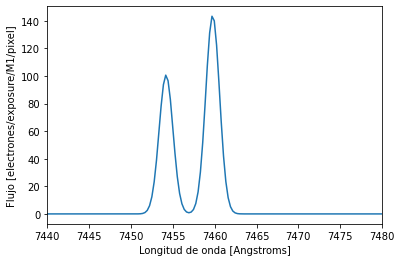

In [26]:
pl.plot(wave, profile)

pl.xlim((1. + z) * 3720., (1. + z) * 3740.)

pl.xlabel('Longitud de onda [Angstroms]')
pl.ylabel('Flujo [electrones/exposure/M1/pixel]')

Pero hay otro pequeño problema. A medida que la luz de la galaxia viaja a través de la atmósfera, se agita de tal manera que aparece manchada en el cielo. El tamaño aparente (en segundos de arco) de una estrella que en realidad debería verse como un punto se debe a lo que se conoce como ["seeing"](https://es.wikipedia.org/wiki/Seeing). El golpeteo puede ser tan fuerte, dependiendo del clima, que la luz de las estrellas se puede perder en la fibra incluso si está centrada correctamente. Veamos esto.

In [27]:
def moffatt(r, fwhm, beta=3.5):
    ## Perfil radial aparente de la luz de la estrella debido al golpeteo de la atmósfera. 
    ## Sección 4 de https://iopscience.iop.org/article/10.1086/675808/pdf;  [arcsecond].  
                                                                                                                                                       
    alpha    = fwhm / 2. / (2.**(1./beta) - 1.)**0.5

    return  (2. * (beta - 1.) / alpha / alpha) * (1. + (r/alpha)**2.)**-beta

In [28]:
fwhm       = 2.0
dr         = 0.01

rs         = np.arange(0.0, 15., dr)  ## [arcseconds].        
ms         = moffatt(rs, fwhm)

(-0.1, 6.0)

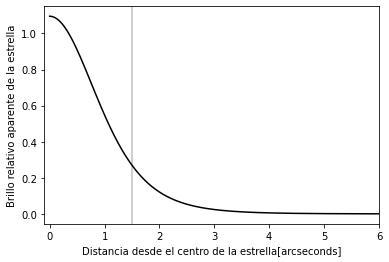

In [29]:
pl.axvline(theta, alpha=0.25, c='k')

pl.plot(rs, ms, c='k')
pl.xlabel('Distancia desde el centro de la estrella[arcseconds]')
pl.ylabel('Brillo relativo aparente de la estrella')
pl.xlim(left=-0.1, right=6.0)

Text(0, 0.5, 'FIBER FRAC.')

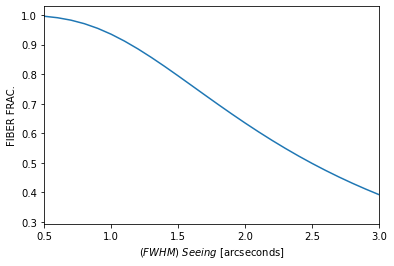

In [30]:
# Rango de valores de anchura-completa @ altura media para el seeing. 

fwhms      = np.arange(0.5, 3.5, 0.1)

# Encuentra el índice en la malla de distancia que es cercana al tamaño de una fibra
indx       = np.abs(rs - theta).argmin()

# Una lista para colectar la fracción de luz que pasa por la fibra para cada valor del seeing.
fiberfracs = []

# Ciclo sobre todos los valores del seeing.
for i, fwhm in enumerate(fwhms):
  # Trabajamos el perfil radial de la estrella.
  ms       = moffatt(rs, fwhm)
  
  # Integramos esto para obtener la luz total dentro un cierto radio
  Is       = 2. * np.pi * dr * np.cumsum(rs * ms)

  # Calculamos la fracción de la fibra para cada valor de r que pedimos. 
  ffrac    = Is / Is[-1]
  
  #Guardamos la fracción de la fibra para el radio correspondiente al tamaño de la fibra.
  fiberfracs.append(ffrac[indx])

fiberfracs = np.array(fiberfracs)

pl.plot(fwhms, fiberfracs)

pl.xlim(0.5, 3.0)

pl.xlabel(r'$(FWHM) \ Seeing \ [{\rm arcseconds}]$')
pl.ylabel(r'FIBER FRAC.')

Entonces, a medida que el aire (altamente) [turbulento](https://es.wikipedia.org/wiki/Turbulencia) se mueve en la atmósfera, la luz de la galaxia se difumina dependiendo del "seeing". Cuando esto empeora, $\simeq 3.0$ segundos de arco, ¡el 60% de la luz se puede perder! DESI necesita algo como un segundo de arco para observar, de lo contrario, simplemente tiramos los datos. Pero finalmente, esto significa que podemos esperar que el 80% de la luz se capture en una exposición normal:

In [31]:
fiberfrac = 0.8
profile  *= fiberfrac  # [electrons/exposure/pixel/M1]

Ahora, dependiendo de las fases de la luna, cada fibra colocada en una galaxia también recibe una cantidad de "fondo" de luz (lunar) que se origina a partir de la luz _dispersada_ por la atmósfera. Este trasfondo depende en gran medida de las fases de la luna; para los ELG, debemos evitar observar cerca de la luna llena. Nota al margen, con un diámetro angular aparente de $0.5$ grados, la luna encajaría en $\approx 6 \times$ lado a lado en el campo de visión DESI (3,2 grados de diámetro).

<img src="images/moon.jpg" alt="Drawing" style="width: 700px;"/>

Un nivel típico para la luz de fondo es 6.4e-18 erg / cm$^2/s/$Angstrom / sq. segundo de arco, con un área de fibra proyectada dada por

In [32]:
fib_area = np.pi * theta**2. # [sq. arcsecond]
fib_area

7.0685834705770345

El nivel de _fondo_ correspondiente de fotones recibidos por un píxel DESI por segundo (como antes):

In [33]:
background  = 3.4e-18       # [erg/s/cm 2/ Angstrom/sq. arcsecond].
background *= fib_area
background                  # [erg/s/cm 2/ Angstrom].

2.4033183799961916e-17

que convertimos de la misma manera que antes:

In [34]:
background /= Energys       # [fotones/s/cm2/Angstrom].

background *= dlambda       # [fotones/s/cm2/pixel].

# Fotones del fondo, recibidos por un pixel de DESI por segundo (asumiendo que no hay perdida en la fibra).
background *= Area          # [fotones/s/pixel/M1].

# Eficiencia 
background *= QE            # [electrones/s/pixel/M1].

background *= exptime       # [electrones/exposición/pixel/M1].

In [35]:
background

array([ 73.67064431,  73.67629616,  73.681948  , ..., 204.6239301 ,
       204.62958195, 204.6352338 ])

El ruido de fondo es Poisson, en promedio esperamos un nivel de fondo de electrones, pero para cualquier exposición dada habrá fluctuaciones de acuerdo con una [distribución](https://en.wikipedia.org/wiki/Poisson_distribution) conocida. Suponiendo que el número de electrones medidos está dominado por el fondo, la varianza que esperamos en el número de electrones medidos es la de una distribución de Poisson:

In [36]:
pixel_variance = background # [electrones/exposición/pixel/M1].

In [37]:
noise = []

for p in background:
    noise.append(np.random.poisson(p, 1)[0])
    
noise = np.array(noise)

In [38]:
noise

array([ 78,  72,  67, ..., 195, 178, 166])

Text(0, 0.5, 'Flujo [electrones/exposición/M1/pixel]')

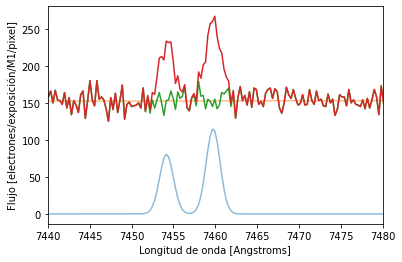

In [39]:
data = profile + noise

pl.plot(wave, profile, alpha=0.5)
pl.plot(wave, background, alpha=0.5)
pl.plot(wave, noise)
pl.plot(wave, data)

pl.xlim((1. + z) * 3720., (1. + z) * 3740.)

pl.xlabel('Longitud de onda [Angstroms]')
pl.ylabel('Flujo [electrones/exposición/M1/pixel]')

DESI tiene fibras dedicadas que apuntan al cielo, en lugar de a las galaxias. Esto permite medir el fondo del cielo para restar el nivel promedio:

In [40]:
data -= background

Text(0, 0.5, 'Flujo [electrones/exposición/M1/pixel]')

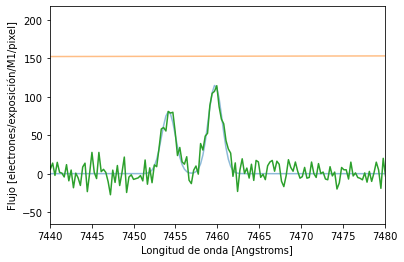

In [41]:
pl.plot(wave, profile, alpha=0.5)
pl.plot(wave, background, alpha=0.5)
pl.plot(wave, data)

pl.xlim((1. + z) * 3720., (1. + z) * 3740.)

pl.xlabel('Longitud de onda [Angstroms]')
pl.ylabel('Flujo [electrones/exposición/M1/pixel]')

¡Necesitamos establecer si esto es suficiente! Este será un ejercicio de ajuste, como en la Introducción. Definiremos una métrica de mejor ajuste: $$\chi^2  = \sum_p \left ( \frac{D_p - A \cdot M_p}{\sigma_p} \right )^2$$ 

que calcula la distancia cuadrada acumulada (ponderada por error) de los datos del modelo. Donde $A$ representa el flujo de línea, $M$ es el modelo que definimos anteriormente y $\sigma_p$ es la desviación estándar (dominada por el fondo) de los electrones en cada píxel.

Si derivamos esto con respecto a $A$, encontramos el flujo de línea que mejor se ajusta (recuerde, la verdad se definió anteriormente). $A = \left (\sum_p D_p M_p / \sigma_p^2 \right ) / \left (\sum_p M_p^2 / \sigma_p^2 \right )$m o

In [42]:
# Flujo de línea estimado 
Mp            = model(wave, width, z) * dlambda # [ergs/s/cm2/pixel]
Mp           /= Energys                         # [fotones/s/cm2/pixel].  
Mp           *= Area                            # [fotones/s/pixel/M1].
Mp           *= QE                              # [electrones/s/pixel/M1].
Mp           *= exptime                         # [electrones/exposición/pixel/M1]. 
Mp           *= fiberfrac                       # [electrones/exposición/pixel/M1].

Text(0, 0.5, 'Flujo[electrones/exposure/M1/pixel]')

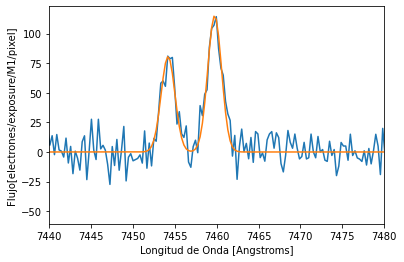

In [43]:
pl.plot(wave,             data)
pl.plot(wave,   Mp * line_flux)

pl.xlim((1. + z) * 3720., (1. + z) * 3740.)

pl.xlabel('Longitud de Onda [Angstroms]')
pl.ylabel('Flujo[electrones/exposure/M1/pixel]')

In [44]:
est_line_flux = np.sum(data * Mp / pixel_variance) / np.sum(Mp**2. / pixel_variance)
est_line_flux 

7.95180422477899e-17

¡Increíble! Hemos podido medir el flujo de la línea  de nuestra galaxia de línea de emisión. Ahora bien, ¿cuál es el error en nuestra medición? Puedes obtener esto de la segunda derivada de $\chi^2$, $\sigma_A^{-2} = \left ( \frac{1}{2} \right )  \frac{\partial^2 \chi^2}{\partial^2 A} = \sum_p \frac{M_p^2}{\sigma_p^2}$.

In [45]:
varA = np.sum(Mp**2 / pixel_variance)
sigA = 1. / np.sqrt(varA)
sigA

3.0496513616343895e-18

Dando una relación señal-ruido de (cuántas veces más grande es la 'señal' que el ruido), $SNR = A / \sigma_A$.

In [46]:
SNR  = est_line_flux / sigA
print('Para un línea OII con flujo de línea de {:.3e}, con una resolución {:.3f}, el SNR es {:.3f}!'.format(line_flux, R, SNR))

Para un línea OII con flujo de línea de 8.000e-17, con una resolución 9000.000, el SNR es 26.074!


Entonces, finalmente, la resolución instrumental que elegimos fue suficiente para alcanzar el flujo de línea que necesitábamos para obtener 17 millones de ELG. De hecho, tenemos algo de espacio de sobra, ya que una SNR de 10 es suficiente para estar seguros de que podemos obtener un corrimiento al rojo. ¡Este es (casi) exactamente el diseño DESI y se ve así!

<img src="images/spectrograph.png" alt="Drawing" style="width: 700px;"/>

¡Felicidades! Su cuidadoso análisis acaba de diseñar el experimento DESI. Estarías listo para escribir tu primer artículo científico pero, desafortunadamente, alguien se te adelantó.

![title](images/comparat.png)

Intentemos realmente ahorrar hasta el último centavo. ¿Puede encontrar la resolución necesaria para lograr la SNR mínima requerida?, es decir, ¿qué $R$ da una SNR de 10? La prueba y error de la celda 9 te llevará a una respuesta pero, con un poco de razonamiento ¡podrías pensar en una forma más rápida!

¡Mejora este cuaderno! Ahora que eres un experto, ¿por qué no revisar de qué cosas nos perdimos? Por ejemplo, asumimos que el flujo del fondo del cielo es plano. ¿Es esto realmente cierto? ¿Por qué no utilizar Google y averiguarlo?

Consulte [aquí](https://arxiv.org/pdf/1310.0615.pdf), [aquí](https://arxiv.org/pdf/2007.14484.pdf) y [aquí](https://arxiv.org/pdf/2007.14484.pdf) si te sientes valiente y quieres saber más.